In [1]:
import math 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 2*x + 1

In [3]:
f(4.5)

52.75

In [4]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

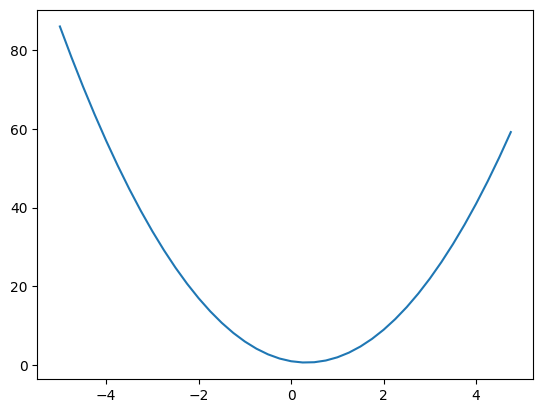

In [5]:
ys = f(xs)
plt.plot(xs, ys)

In [6]:
h = 0.0000001
x = -4 
print(f"Value of X + h: {f(x+h)}"), 
print(f"Value of X: {f(x)}"),
print(f"Value of X - h: {f(x-h)}"),
print(f"Difference: {f(x+h)- f(x)}"),
print(f"Slope of : {(f(x+h) - f(x))/h}")


Value of X + h: 56.999997400000034
Value of X: 57
Value of X - h: 57.000002600000045
Difference: -2.599999966435007e-06
Slope of : -25.99999966435007


In [7]:
a = 2.0 
b = -3.0
c = 10.0

d = a*b + c 
print(d)

4.0


In [8]:
h = 0.0000001

# inputs a,b,c 

d1 = a*b + c
a += h 
d2 = a*b + c

print(f"d1: {d1}"),
print(f"d2: {d2}"),
print(f"Slope of : {(d2 - d1)/h}")

d1: 4.0
d2: 3.9999997
Slope of : -2.9999999995311555


In [64]:
class Value: 
    
    def __init__(self, data, _children=(), _op= '', label = ''): 
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        
    def __repr__(self): 
        return f"Value(data = {self.data})"
    
    def __add__(self, other): 
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other): 
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
    def tanh(self): 
        n = self.data
        t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1)
        out = Value(t, (self,), 'tanh')
        return out

In [33]:
a = Value(2.0, label = 'a')
b = Value(-3, label = 'b')
c= Value(10, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0 , label = 'f')

L = d * f;L.label = 'L'

In [34]:
from graphviz import Digraph

def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

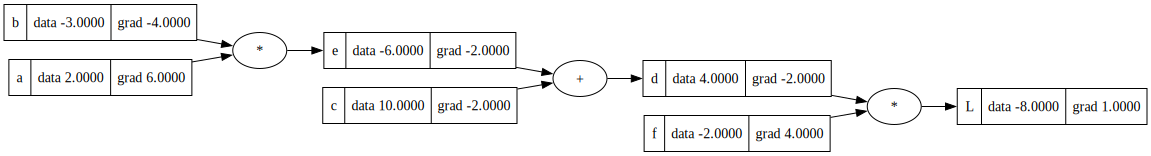

In [57]:
draw_dot(L)

In [60]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a*b; 
d = e + c

L = d * f
print(L.data)

-7.286496


In [59]:
def lol(): 
     
    h = 0.001   

    a = Value(2.0, label = 'a')
    b = Value(-3, label = 'b')
    c= Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0 , label = 'f')

    L = d * f;L.label = 'L'
    L1 = L.data
    
    a = Value(2.0 , label = 'a')
    b = Value(-3 , label = 'b')
    c= Value(10, label = 'c')
    e = a*b; e.label = 'e'

    d = e + c; d.label = 'd'
    f = Value(-2.0 , label = 'f')

    L = d * f;L.label = 'L'
    L2 = L.data
    
    print((L2 - L1)/ h )
    
lol()

-3.9999999999995595


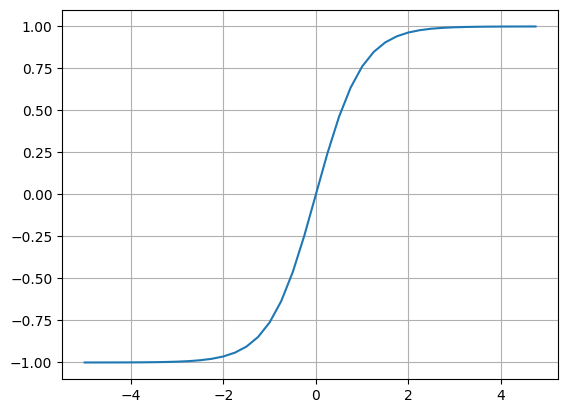

In [61]:
plt.plot(np.arange(-5, 5, 0.25), np.tanh(np.arange(-5, 5, 0.25))); plt.grid()

In [70]:
# Inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# Weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias 
b = Value(8, label = 'b')
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh();o.label = 'o'

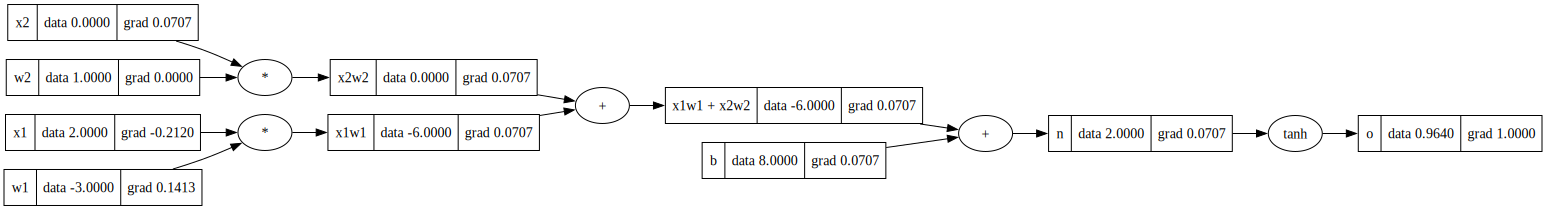

In [85]:
draw_dot(o)

In [84]:
o.grad = 1.0
n.grad = 1- o.data**2
b.grad = n.grad
x1w1x2w2.grad = n.grad
x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad
x2.grad = x2w2.grad * w2.data
w2.grad = x2w2.grad * x2.data
x1.grad = x1w1.grad * w1.data
w1.grad = x1w1.grad * x1.data
